In [2]:
import csv 
from shapely.geometry import Point, mapping
from fiona import collection
import geopandas as gp
import matplotlib.pyplot as plt


In [4]:
with open("C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv", 'r', encoding='ISO-8859-1') as  f:
    reader = csv.DictReader(f)

In [7]:
# write latitude longitude in csv into shapefile, with properties
schema = {'geometry': 'Point',
          'properties': {'address': 'str',
                         'city': 'str',
                         'state': 'str',
                         'zipcode': 'str',
                         'walkability': 'str',
                         'walkabilitydescription': 'str',
                         'bikability': 'str',
                         'bikabilitydescription': 'str',
                         },

          }

list = ['C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Dallas()/dallasproperties08_22_18.csv',
        'C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/San Antonio/sanantonioproperties.csv',
       'C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Austin/austinproperties.csv',
        'C:/Users/Joe/Documents/42Floors/2018-08-08_23_12_24/Houston()/houstonproperties_08_14_2018.csv']
with collection("Houston.shp", "w", "ESRI Shapefile", schema) as output:
    for x in list:
        with open(x, 'r',
                  encoding='ISO-8859-1') as f:
            reader = csv.DictReader(f)
            for row in reader:
                point = Point(float(row['lon']), float(row['lat']))
                output.write({
                    'properties': {
                        'address': row['address'],
                        'city': row['city'],
                        'state': row['state'],
                        'zipcode': row['zipcode'],
                        'walkability': row['walkability'],
                        'walkabilitydescription': row['walkabilitydescription'],
                        'bikability': row['bikability'],
                        'bikabilitydescription': row['bikabilitydescription'],
                    },  # add all the properties into the shapefile point!
                    'geometry': mapping(point)
                })


In [13]:
import geopandas as gp

realestatelocations = gp.GeoDataFrame.from_file(
    'C:/Users/Joe/PycharmProjects/GIS/Texas.shp')

realestatelocations.head()

,address,city,state,zipcode,walkabilit,walkabil_1,bikability,bikabili_1,geometry
0,13800 montfort dr,dallas,tx,75240,54,Somewhat Walkable,48,Somewhat Bikeable,POINT (-96.8138 32.937107)
1,1220 pennsylvania ave,fort-worth,tx,76104,55,Somewhat Walkable,61,Bikeable,POINT (-97.33857999999999 32.738495)
2,3000 e hwy 377,granbury,tx,76048,3,Car-Dependent,nan,nan,POINT (-97.83015399999999 32.430866)
3,5001 spring valley rd,dallas,tx,75244,58,Somewhat Walkable,nan,nan,POINT (-96.82654599999999 32.93953)
4,8224 white settlement rd,fort-worth,tx,76108,32,Car-Dependent,nan,nan,POINT (-97.45943 32.759747)


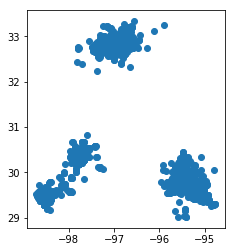

In [9]:
realestatelocations.plot()

In [10]:
import descartes
states = gp.read_file("C:/Users/Joe/Downloads/gz_2010_48_140_00_500k/gz_2010_48_140_00_500k.shp")
states.head()


,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry
0,1400000US48029110100,48,029,110100,1101,Tract,1.364,"POLYGON ((-98.499279 29.433827, -98.4991469999..."
1,1400000US48029110300,48,029,110300,1103,Tract,0.598,"POLYGON ((-98.48687199999999 29.407662, -98.48..."
2,1400000US48029110500,48,029,110500,1105,Tract,0.450,"POLYGON ((-98.51410799999999 29.420499, -98.51..."
3,1400000US48029120300,48,029,120300,1203,Tract,1.841,"POLYGON ((-98.459284 29.480134, -98.4592739999..."
4,1400000US48029120702,48,029,120702,1207.02,Tract,1.246,"POLYGON ((-98.481872 29.491166, -98.4816079999..."


Current size: [24.0, 18.0]


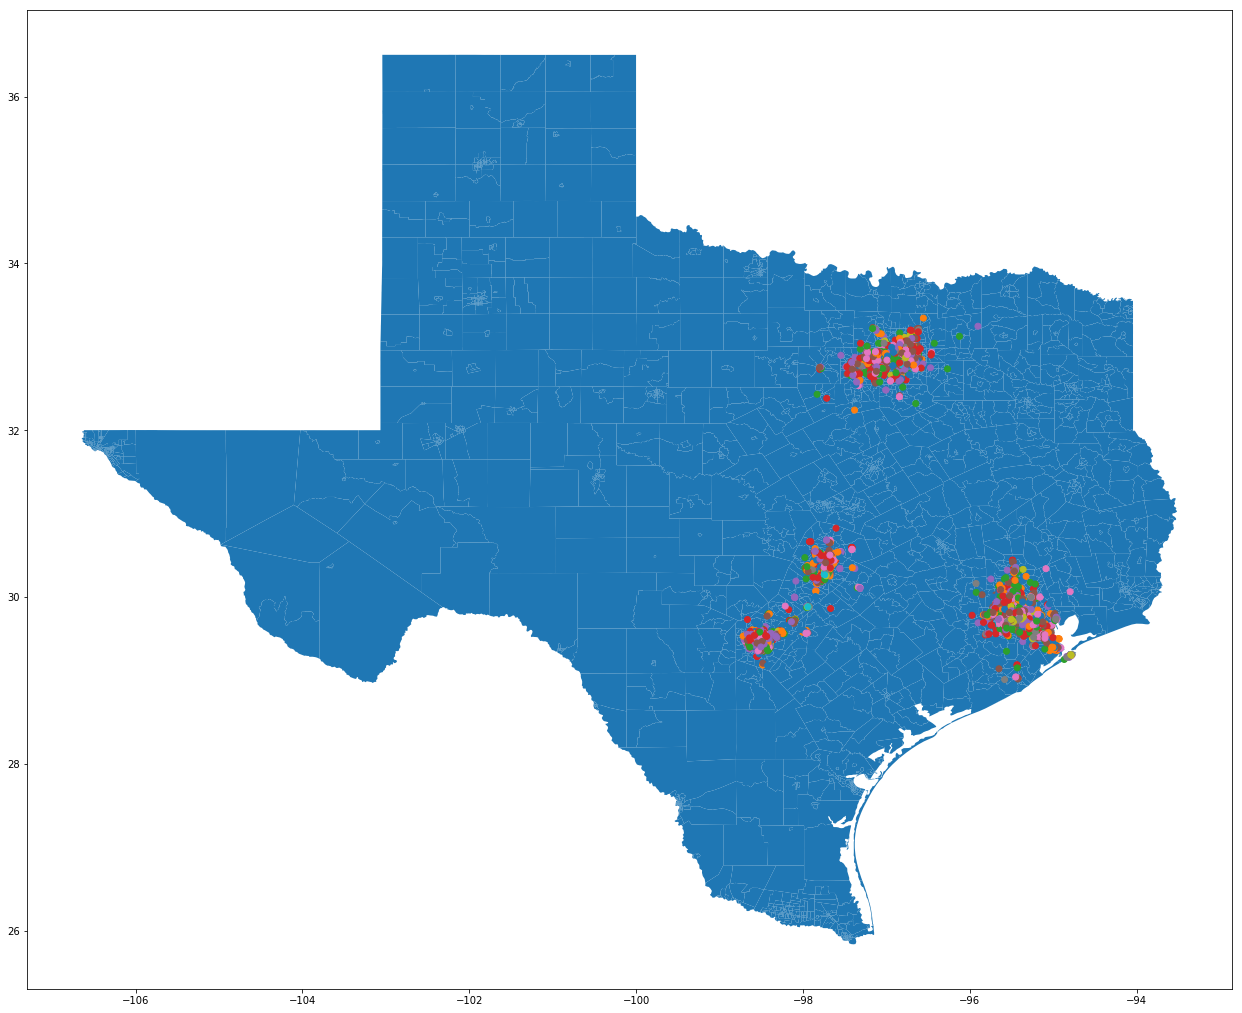

In [12]:
# Get current size

fig_size = plt.rcParams["figure.figsize"]
ax = states.plot()
realestatelocations.plot(column='walkabilit', ax=ax)
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 24
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

ax = states.plot()
realestatelocations.plot(column='walkabilit', ax=ax)
